In [145]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [146]:
data = pd.read_csv('newmm.csv')

# 1. Overview

In [147]:
data.shape

(346201, 16)

In [148]:
data.head()

,No,pin,yob,sex,age,last_pbs,last_mbs,GroupingA10,GroupingC0,GroupingC10,Concatenate,MMGrouping,Agegrouping,Lastservice,disDays,dead
0,0,7275102840,1924,M,80,14/8/11,14/8/11,A10,C0,No,A10C0No,B,75-84,14/8/11,1236,YES
1,1,316560614,1925,F,79,30/12/14,30/12/14,No,C0,No,NoC0No,F,75-84,30/12/14,2,NO
2,2,1706657926,1919,F,85,16/7/05,11/2/03,No,C0,No,NoC0No,F,85-100,16/7/05,3456,YES
3,3,9352250463,1971,F,33,30/12/14,30/12/14,No,C0,No,NoC0No,F,25-34,30/12/14,2,NO
4,4,6529626350,1944,F,60,29/12/14,15/11/14,No,C0,No,NoC0No,F,55-64,29/12/14,3,NO


In [149]:
data.tail()

,No,pin,yob,sex,age,last_pbs,last_mbs,GroupingA10,GroupingC0,GroupingC10,Concatenate,MMGrouping,Agegrouping,Lastservice,disDays,dead
346196,346196,3768743454,1945,F,59,26/11/14,13/10/14,No,No,C10,NoNoC10,G,55-64,26/11/14,36,NO
346197,346197,218467096,1943,M,61,18/12/14,23/12/14,No,No,C10,NoNoC10,G,55-64,23/12/14,9,NO
346198,346198,9336591675,1954,M,50,8/12/14,17/12/14,No,No,C10,NoNoC10,G,45-54,17/12/14,15,NO
346199,346199,1989478149,1961,M,43,24/10/14,4/12/14,No,No,C10,NoNoC10,G,35-44,4/12/14,28,NO
346200,346200,6154313837,1944,M,60,14/12/14,16/12/14,No,No,C10,NoNoC10,G,55-64,16/12/14,16,NO


In [150]:
data = data.drop('No', 1)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346201 entries, 0 to 346200
Data columns (total 15 columns):
pin            346201 non-null int64
yob            346201 non-null int64
sex            346201 non-null object
age            346201 non-null int64
last_pbs       346201 non-null object
last_mbs       346182 non-null object
GroupingA10    346201 non-null object
GroupingC0     346201 non-null object
GroupingC10    346201 non-null object
Concatenate    346201 non-null object
MMGrouping     346201 non-null object
Agegrouping    346200 non-null object
Lastservice    346201 non-null object
disDays        346201 non-null int64
dead           346201 non-null object
dtypes: int64(4), object(11)
memory usage: 39.6+ MB


# 2. Pre-processing

In [152]:
data.isnull().sum()

pin             0
yob             0
sex             0
age             0
last_pbs        0
last_mbs       19
GroupingA10     0
GroupingC0      0
GroupingC10     0
Concatenate     0
MMGrouping      0
Agegrouping     1
Lastservice     0
disDays         0
dead            0
dtype: int64

In [153]:
data.Agegrouping.unique()

array(['75-84', '85-100', '25-34', '55-64', '65-74', nan, '45-54',
       '35-44', '0-14', '15-24'], dtype=object)

In [154]:
data.loc[(0 <= data.age) & (data.age <= 14),'Agegrouping']='0-14'
data.loc[(15 <= data.age) & (data.age <= 24),'Agegrouping']='15-24'
data.loc[(25 <= data.age) & (data.age <= 34),'Agegrouping']='25-34'
data.loc[(35 <= data.age) & (data.age <= 44),'Agegrouping']='35-44'
data.loc[(45 <= data.age) & (data.age <= 54),'Agegrouping']='45-54'
data.loc[(55 <= data.age) & (data.age <= 64),'Agegrouping']='55-64'
data.loc[(65 <= data.age) & (data.age <= 74),'Agegrouping']='65-74'
data.loc[(75 <= data.age) & (data.age <= 84),'Agegrouping']='75-84'
data.loc[(85 <= data.age) & (data.age <= 100),'Agegrouping']='85-100'

In [155]:
data.Agegrouping.unique()

array(['75-84', '85-100', '25-34', '55-64', '65-74', '45-54', '35-44',
       '0-14', '15-24'], dtype=object)

In [443]:
data.isnull().sum()

pin             0
yob             0
sex             0
age             0
last_pbs        0
last_mbs       19
GroupingA10     0
GroupingC0      0
GroupingC10     0
Concatenate     0
MMGrouping      0
Agegrouping     0
Lastservice     0
disDays         0
dead            0
dtype: int64

# 3. Explorotary Data Analysis

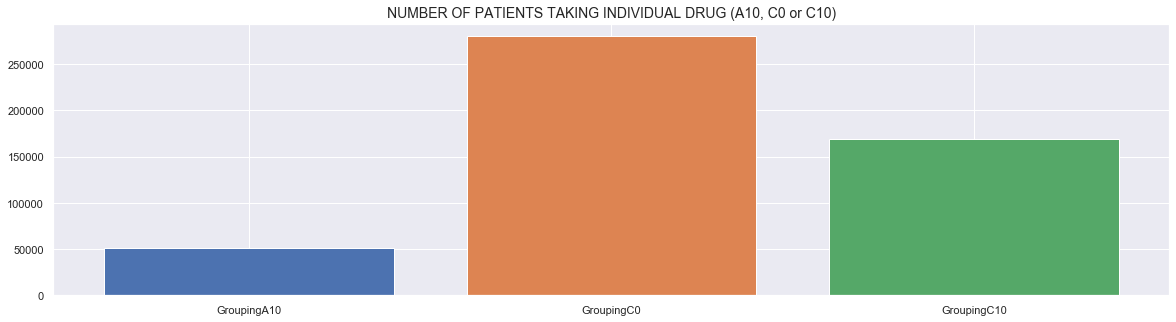

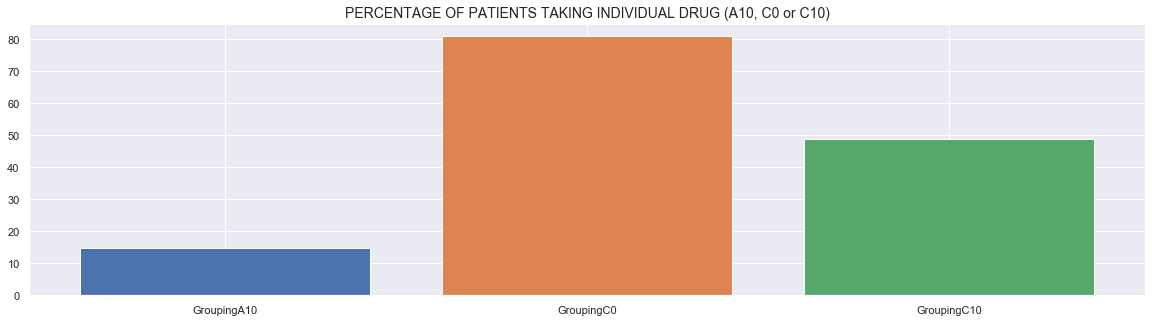

In [649]:
groups = []
for col, value in zip(['GroupingA10', 'GroupingC0', 'GroupingC10'], ['A10', 'C0', 'C10']):
    groups.append(data[data[col] == value])
plt.figure(figsize=(20,5))
for col, i in zip(['GroupingA10', 'GroupingC0', 'GroupingC10'], range(3)):
    plt.bar(x = col, height = groups[i].pin.count())
plt.title('NUMBER OF PATIENTS TAKING INDIVIDUAL DRUG (A10, C0 or C10)', fontsize=14)
plt.show()

plt.figure(figsize=(20,5))
for col, i in zip(['GroupingA10', 'GroupingC0', 'GroupingC10'], range(3)):
    plt.bar(x = col, height = groups[i].pin.count()/len(data)*100)
plt.title('PERCENTAGE OF PATIENTS TAKING INDIVIDUAL DRUG (A10, C0 or C10)', fontsize=14)
plt.show()

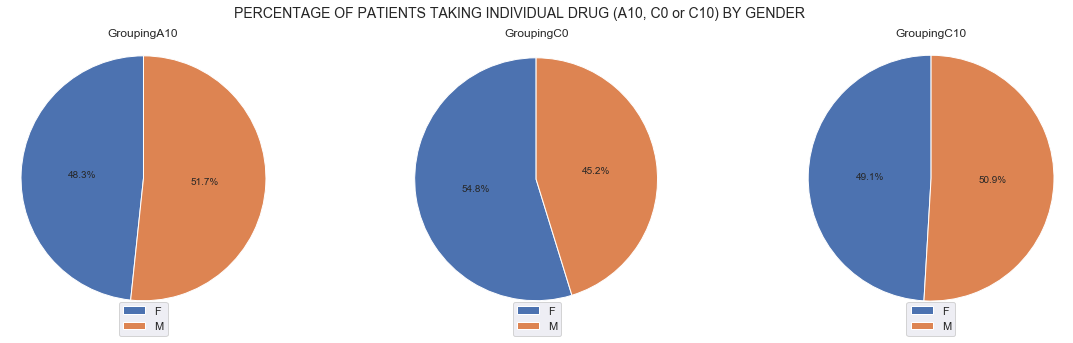

In [654]:
genders = []
counts = {}
for i, value in zip(range(3), ['A10', 'C0', 'C10']) :
    genders, counts['{}'.format(value)] = np.unique(groups[i].sex, return_counts = True)
df = pd.DataFrame(counts, index = genders).T
dfp = pd.DataFrame().reindex_like(df)
for i in range(3):
    dfp.iloc[i] = [x/sum(df.iloc[i])*100 for x in df.iloc[i]]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('PERCENTAGE OF PATIENTS TAKING INDIVIDUAL DRUG (A10, C0 or C10) BY GENDER', fontsize=14)
for each, value, ax in zip(['GroupingA10', 'GroupingC0', 'GroupingC10'], range(3), (ax1, ax2, ax3)):
    ax.pie(dfp.iloc[value], labeldistance = .53, pctdistance = .5, autopct='%1.1f%%', startangle=90)
    ax.legend(genders, loc="lower center", bbox_to_anchor=(.50,-.1))
    ax.set_title(each, loc='center')
    ax.axis('square')

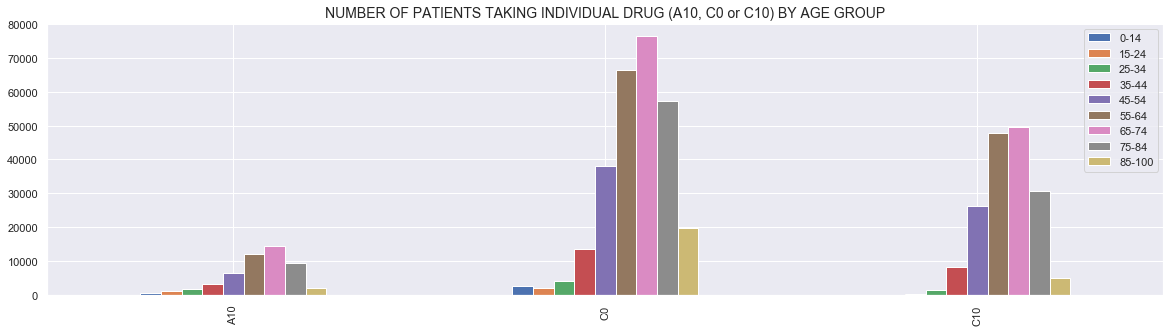

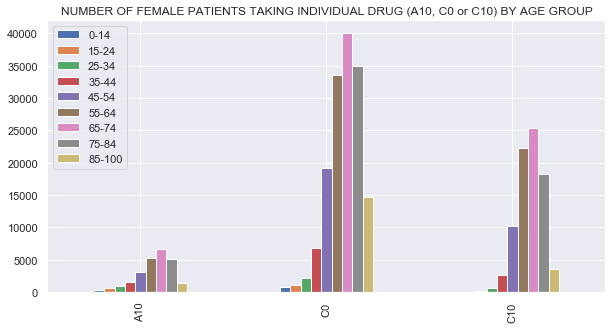

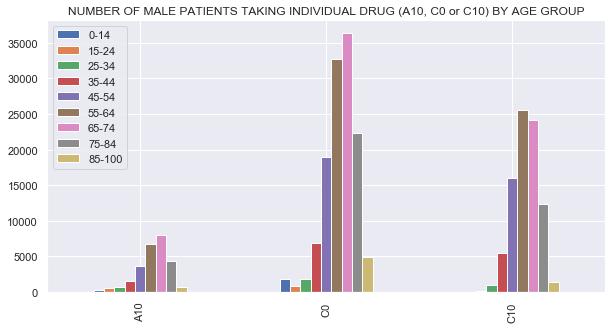

In [657]:
agegroups = []
counts = {}
for i, value in zip(range(3), ['A10', 'C0', 'C10']) :
    agegroups, counts['{}'.format(value)] = np.unique(groups[i].Agegrouping, return_counts = True)
df = pd.DataFrame(counts, index = agegroups).T
df.plot.bar(figsize=(20,5))
plt.title('NUMBER OF PATIENTS TAKING INDIVIDUAL DRUG (A10, C0 or C10) BY AGE GROUP', fontsize=14)
plt.show()

fcounts = {}
for i, value in zip(range(3), ['A10', 'C0', 'C10']) :
    _, fcounts['{}'.format(value)] = np.unique(groups[i][groups[i]['sex']=='F'].Agegrouping, return_counts = True)
df = pd.DataFrame(fcounts, index = agegroups).T
df.plot.bar(figsize=(10,5))
plt.title('NUMBER OF FEMALE PATIENTS TAKING INDIVIDUAL DRUG (A10, C0 or C10) BY AGE GROUP', fontsize=12)
plt.show()

mcounts = {}
for i, value in zip(range(3), ['A10', 'C0', 'C10']) :
    _, mcounts['{}'.format(value)] = np.unique(groups[i][groups[i]['sex']=='M'].Agegrouping, return_counts = True)
df = pd.DataFrame(mcounts, index = agegroups).T
df.plot.bar(figsize=(10,5))
plt.title('NUMBER OF MALE PATIENTS TAKING INDIVIDUAL DRUG (A10, C0 or C10) BY AGE GROUP', fontsize=12)
plt.show()

# dfp = pd.DataFrame().reindex_like(df)
# for i in range(3):
#     dfp.iloc[i] = [x/sum(df.iloc[i])*100 for x in df.iloc[i]]
# dfp.plot.bar(figsize=(20,5))
# plt.title('Percentage of patients taking individual drug (A10, C0 or C10) by age group')
# plt.show()

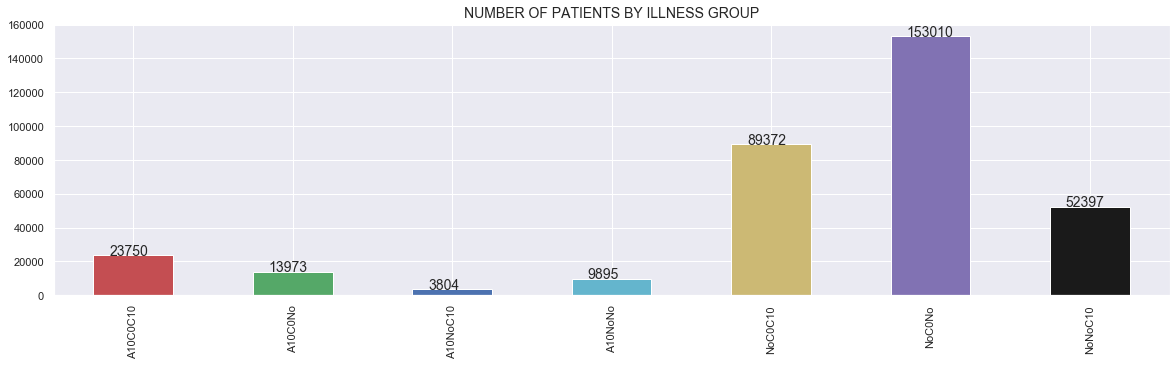

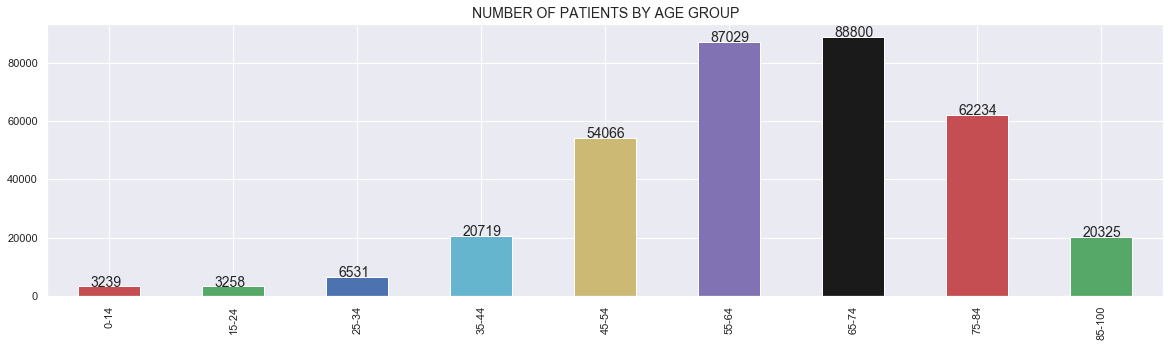

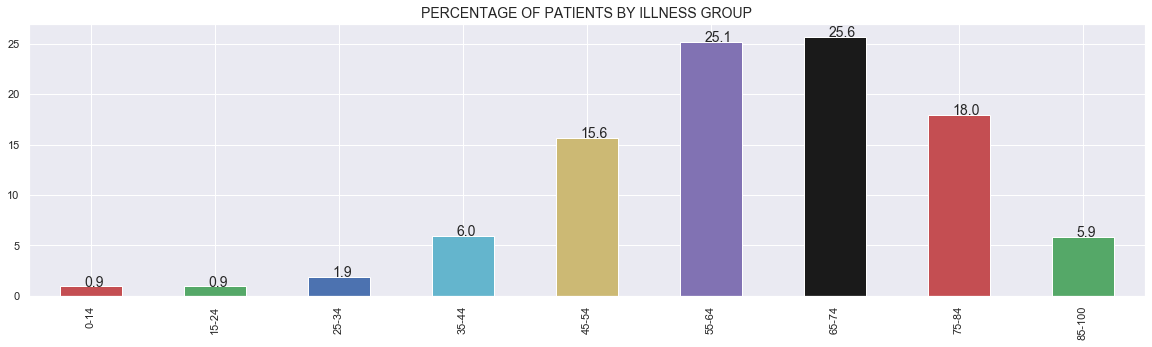

In [665]:
patient = data[['Concatenate']]
patient = pd.pivot_table(patient, index=['Concatenate'], aggfunc=['size'])
patient['size'].plot.bar(figsize=(20,5), colors = list('rgbcymk'))
for i, v in enumerate(patient['size']):
    plt.text(x = i-.15, y = v, s=str(v), fontsize=14)
plt.title('NUMBER OF PATIENTS BY ILLNESS GROUP', fontsize=14)
plt.xlabel('')
plt.show()

patient = data[['Agegrouping']]
patient = pd.pivot_table(patient, index=['Agegrouping'], aggfunc=['size'])
patient['size'].plot.bar(figsize=(20,5), colors = list('rgbcymk'))
for i, v in enumerate(patient['size']):
    plt.text(x = i-.15, y = v, s=str(v), fontsize=14)
plt.title('NUMBER OF PATIENTS BY AGE GROUP', fontsize=14)
plt.xlabel('')
plt.show()

patient['(%)'] = patient.iloc[:,0]/len(data)*100
patient['(%)'].plot.bar(figsize=(20,5), colors = list('rgbcymk'))
for i, v in enumerate(patient['(%)']):
    plt.text(x = i-.05, y = v, s=str(round(v,1)), fontsize=14)
plt.title('PERCENTAGE OF PATIENTS BY ILLNESS GROUP', fontsize=14)
plt.xlabel('')
plt.show()

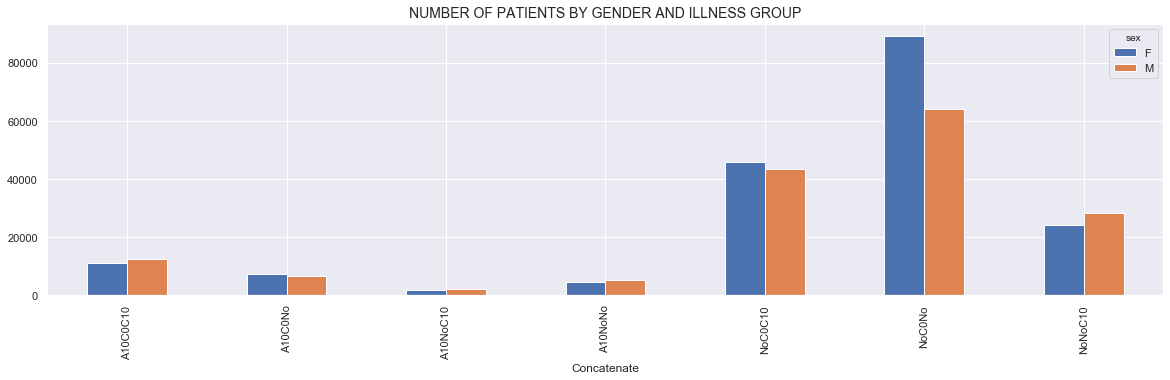

In [659]:
data.groupby(['Concatenate','sex']).size().unstack(fill_value=0).plot.bar(figsize=(20,5))
plt.title('NUMBER OF PATIENTS BY GENDER AND ILLNESS GROUP', fontsize=14)
plt.show()

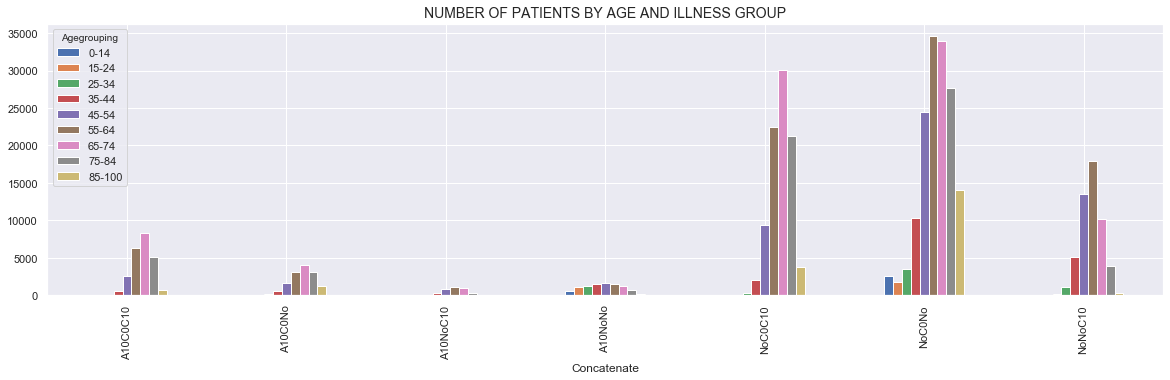

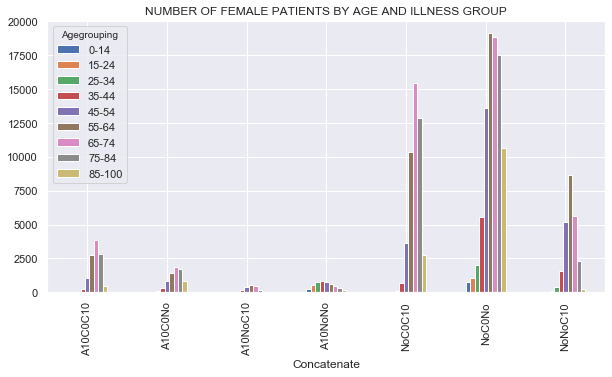

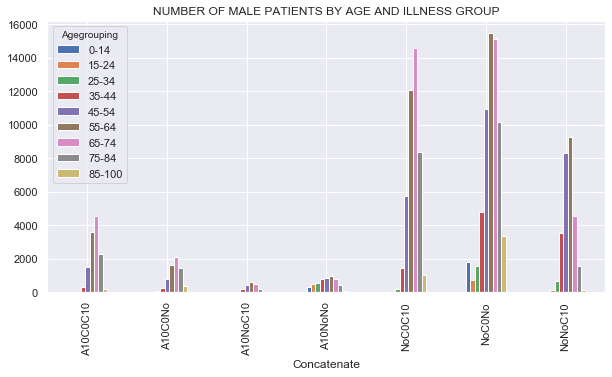

In [661]:
data.groupby(['Concatenate','Agegrouping']).size().unstack(fill_value=0).plot.bar(figsize=(20,5))
plt.title('NUMBER OF PATIENTS BY AGE AND ILLNESS GROUP', fontsize=14)
plt.show()

data[(data['sex']=='F')].groupby(['Concatenate','Agegrouping']).size().unstack(fill_value=0).plot.bar(figsize=(10,5))
plt.title('NUMBER OF FEMALE PATIENTS BY AGE AND ILLNESS GROUP', fontsize=12)
plt.show()

data[(data['sex']=='M')].groupby(['Concatenate','Agegrouping']).size().unstack(fill_value=0).plot.bar(figsize=(10,5))
plt.title('NUMBER OF MALE PATIENTS BY AGE AND ILLNESS GROUP', fontsize=12)
plt.show()

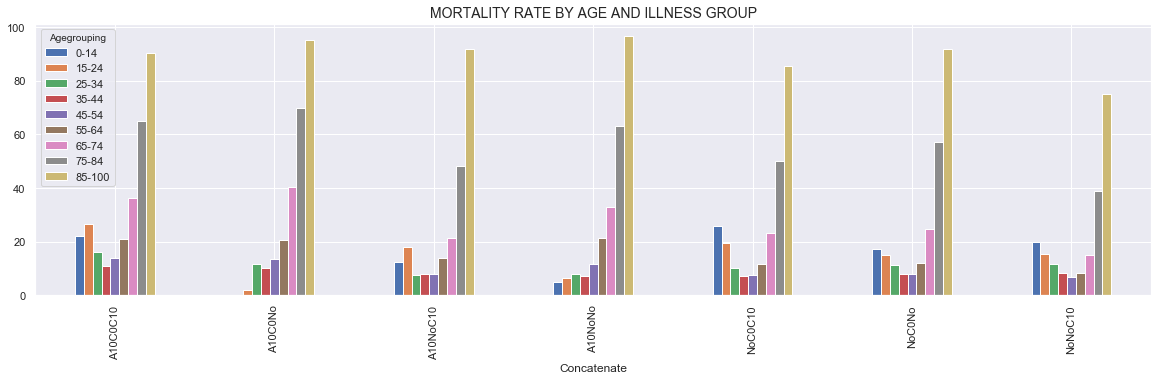

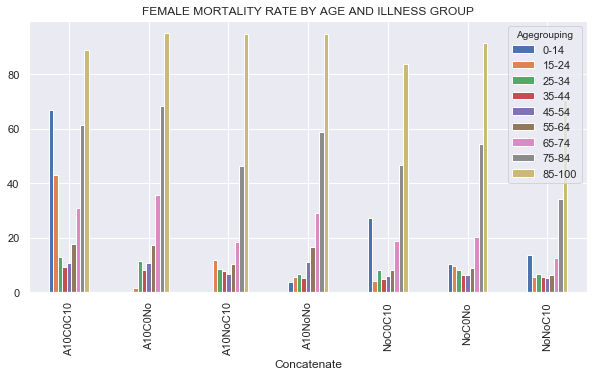

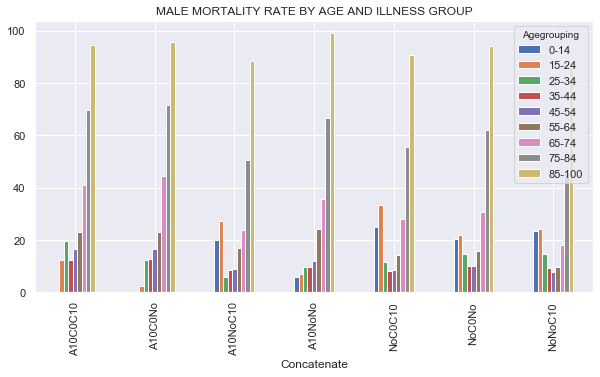

In [662]:
mortality = data[['Agegrouping','Concatenate', 'dead']]
mortality = pd.pivot_table(mortality, values = ['dead'], index=['Concatenate', 'Agegrouping'], 
                       columns = ['dead'], aggfunc=['size'])
mortality = mortality.replace(np.nan, 0)
mortality['mortality(%)'] = mortality.iloc[:,1]/(mortality.iloc[:,1] + mortality.iloc[:,0])*100
# print(mortality.head(),'\n...\n...\n...')
mortality['mortality(%)'].unstack(fill_value=0).plot.bar(figsize=(20,5))
plt.title('MORTALITY RATE BY AGE AND ILLNESS GROUP', fontsize=14)
plt.show()

fmortality = data[(data['sex']=='F')][['Agegrouping','Concatenate', 'dead']]
fmortality = pd.pivot_table(fmortality, values = ['dead'], index=['Concatenate', 'Agegrouping'], 
                       columns = ['dead'], aggfunc=['size'])
fmortality = fmortality.replace(np.nan, 0)
fmortality['mortality(%)'] = fmortality.iloc[:,1]/(fmortality.iloc[:,1] + fmortality.iloc[:,0])*100
# print(fmortality.head(),'\n...\n...\n...')
fmortality['mortality(%)'].unstack(fill_value=0).plot.bar(figsize=(10,5))
plt.title('FEMALE MORTALITY RATE BY AGE AND ILLNESS GROUP', fontsize=12)
plt.show()

mmortality = data[(data['sex']=='M')][['Agegrouping','Concatenate', 'dead']]
mmortality = pd.pivot_table(mmortality, values = ['dead'], index=['Concatenate', 'Agegrouping'], 
                       columns = ['dead'], aggfunc=['size'])
mmortality = mmortality.replace(np.nan, 0)
mmortality['mortality(%)'] = mmortality.iloc[:,1]/(mmortality.iloc[:,1] + mmortality.iloc[:,0])*100
# print(male.head(),'\n...\n...\n...')
mmortality['mortality(%)'].unstack(fill_value=0).plot.bar(figsize=(10,5))
plt.title('MALE MORTALITY RATE BY AGE AND ILLNESS GROUP', fontsize=12)
plt.show()

# 4. Model development

In [1]:
cols = ['pin', 'sex', 'age', 'GroupingA10', 'GroupingC0', 'GroupingC10', 'dead']
df = data[cols]

NameError: name 'data' is not defined